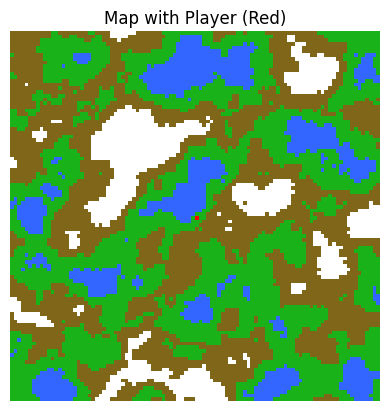

AI Model Accuracy: 0.975
[Turn 1] プレイヤーの攻撃！
🎯 Hit! 敵に 29 ダメージ！ 残HP: 71
[Turn 2] プレイヤーの攻撃！
🎯 Hit! 敵に 29 ダメージ！ 残HP: 42
[Turn 3] プレイヤーの攻撃！
🎯 Hit! 敵に 29 ダメージ！ 残HP: 13
[Turn 4] プレイヤーの攻撃！
🎯 Hit! 敵に 29 ダメージ！ 残HP: -16


In [ ]:

# !pip install noise scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### ======== 地形マップの生成 ========

width = 100
height = 100
scale = 20.0

world = np.zeros((height, width))
for y in range(height):
    for x in range(width):
        noise_val = pnoise2(x / scale, y / scale, octaves=6)
        world[y][x] = noise_val

# 正規化（0〜1）
world = (world - world.min()) / (world.max() - world.min())

# プレイヤー座標（中央）
px, py = width // 2, height // 2

# 色分け関数（プレイヤー位置含む）
def get_color(value, x, y):
    if x == px and y == py:
        return [1.0, 0.0, 0.0]  # 赤（プレイヤー）
    elif value < 0.3:
        return [0.2, 0.4, 1.0]  # 水色（海）
    elif value < 0.5:
        return [0.1, 0.7, 0.1]  # 緑（草原）
    elif value < 0.7:
        return [0.5, 0.4, 0.1]  # 茶（山）
    else:
        return [1.0, 1.0, 1.0]  # 白（雪山）

color_map = np.zeros((height, width, 3))
for y in range(height):
    for x in range(width):
        color_map[y][x] = get_color(world[y][x], x, y)

# 描画
plt.imshow(color_map)
plt.title("Map with Player (Red)")
plt.axis('off')
plt.show()

### ======== 敵データのAI学習 ========

def generate_enemy_data(num_samples=100):
    data = []
    labels = []
    for _ in range(num_samples):
        aggressiveness = random.uniform(0, 1)
        speed = random.uniform(0, 1)
        resistance = random.uniform(0, 1)
        features = [aggressiveness, speed, resistance]
        label = 1 if aggressiveness + speed > 1.0 else 0
        data.append(features)
        labels.append(label)
    return data, labels

# データ生成と学習
X, y = generate_enemy_data(200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"AI Model Accuracy: {accuracy:.3f}")

### ======== 戦闘シミュレーション（命中率ベース） ========

enemy_hp = 100
max_damage = 30
battle_log = []

def simulate_attack(hit_rate):
    global enemy_hp
    chance = random.random()
    if chance < hit_rate:
        damage = int(hit_rate * max_damage)
        enemy_hp -= damage
        log = f"🎯 Hit! 敵に {damage} ダメージ！ 残HP: {enemy_hp}"
    else:
        log = f"💨 Miss... 敵のHPはそのまま: {enemy_hp}"
    battle_log.append(log)
    print(log)

# バトル開始
turn = 1
while enemy_hp > 0:
    print(f"[Turn {turn}] プレイヤーの攻撃！")
    simulate_attack(accuracy)
    turn += 1
